In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('hypothyroid.csv')

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

## Nettoyage des données

## Évaluation des données manquantes

###  <font color=#063970>1- Vérifier si Dataset contient des données NaN  (df.isnull().values.any())</font>

In [5]:
df.isnull().values.any()

False

###  <font color=#063970>2- Remplacer un caractère par NaN  </font>

In [6]:
df.replace('?', np.nan, inplace= True)

###  <font color=#063970>3- Compter le nombre de NaN par colonnes  </font>

In [7]:
df.isnull().values.sum() #total de NaN dans Dataset

6064

In [8]:
df.isnull().sum() #par colonnes 

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

###  <font color=#063970>4- Supprimer les lignes NaN selon sex  </font>

In [9]:
df = df.dropna(subset=['sex'])
df.isnull().sum()

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           352
T3 measured                     0
T3                            745
TT4 measured                    0
TT4                           217
T4U measured                    0
T4U                           367
FTI measured                    0
FTI                           365
TBG measured                    0
TBG                          3622
referral source                 0
binaryClass   

###  <font color=#063970>5- Type de chaque colonne </font>

In [10]:
df.dtypes

age                           object
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                           object
T3 measured                   object
T3                            object
TT4 measured                  object
TT4                           object
T4U measured                  object
T4U                           object
FTI measured                  object
FTI                           object
TBG measured                  object
T

###  <font color=#063970>6- Trouver les colonnes qui contient des nombres </font>

#### Expressions régulières

In [11]:
import re

#### Pattern d'un nombre réel

In [12]:
realnum=re.compile("^ *?[-+]?[0-9]*\.?[0-9]+(e[-+]?[0-9]+)?$")

In [13]:
if(re.match(realnum, '-3')):
    print('is number')
else:
    print('in not a number')
        

is number


In [14]:
def isnumber(ch):
    if(re.match(realnum, str(ch))):
        return True
    else:
        return False
    
    

In [15]:
isnumber(" 22")

True

In [16]:
isnumber(df['T4U'][56])

True

In [17]:
rng = np.random.randint(1000, size=3)
rng

array([891, 152, 918])

###  <font color=#063970>7- Convertir les colonnes contenant des nombre en type float </font>

In [18]:
qualitative = list() # list pour les colonnes qualitatives
for col in df.columns:
    ind=0
    for i in rng:
        if(not(pd.isnull(df[col][i])) and isnumber(df[col][i]) ):
            ind = ind +1
    if(ind!=0):
        df[col] = df[col].astype('float32')
    else:
        qualitative.append(col)
####################################################
df.info()     


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3622 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3621 non-null   float32
 1   sex                        3622 non-null   object 
 2   on thyroxine               3622 non-null   object 
 3   query on thyroxine         3622 non-null   object 
 4   on antithyroid medication  3622 non-null   object 
 5   sick                       3622 non-null   object 
 6   pregnant                   3622 non-null   object 
 7   thyroid surgery            3622 non-null   object 
 8   I131 treatment             3622 non-null   object 
 9   query hypothyroid          3622 non-null   object 
 10  query hyperthyroid         3622 non-null   object 
 11  lithium                    3622 non-null   object 
 12  goitre                     3622 non-null   object 
 13  tumor                      3622 non-null   objec

In [19]:
len(qualitative)

24

###  <font color=#063970>8- Encodage des colonnes qualitatives </font>

In [20]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [21]:
for col in qualitative:
    df[col]=enc.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3622 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3621 non-null   float32
 1   sex                        3622 non-null   int32  
 2   on thyroxine               3622 non-null   int32  
 3   query on thyroxine         3622 non-null   int32  
 4   on antithyroid medication  3622 non-null   int32  
 5   sick                       3622 non-null   int32  
 6   pregnant                   3622 non-null   int32  
 7   thyroid surgery            3622 non-null   int32  
 8   I131 treatment             3622 non-null   int32  
 9   query hypothyroid          3622 non-null   int32  
 10  query hyperthyroid         3622 non-null   int32  
 11  lithium                    3622 non-null   int32  
 12  goitre                     3622 non-null   int32  
 13  tumor                      3622 non-null   int32

###  <font color=#063970>9- Remplacement des valeurs NaN </font>

In [22]:
df.isnull().sum()

age                            1
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          352
T3 measured                    0
T3                           745
TT4 measured                   0
TT4                          217
T4U measured                   0
T4U                          367
FTI measured                   0
FTI                          365
TBG measured                   0
TBG                            0
referral source                0
binaryClass                    0
dtype: int

In [23]:
df['age'] = df['age'].fillna((df['age'].median()))
df['TSH'] = df['TSH'].fillna((df['TSH'].median()))
df['T3'] = df['T3'].fillna((df['T3'].median()))
df['TT4'] = df['TT4'].fillna((df['TT4'].median()))
df['T4U'] = df['T4U'].fillna((df['T4U'].median()))
df['FTI'] = df['FTI'].fillna((df['FTI'].median()))

In [24]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [25]:
df['TBG'].value_counts()


0    3622
Name: TBG, dtype: int64

In [26]:
df['TBG'].value_counts().size

1

### Détection des colonnes qui contiennent une seule valeurs

In [27]:
for col in df.columns:
    if (df[col].value_counts().size == 1):
        print(col)

TBG measured
TBG


In [28]:
df['TBG measured'].value_counts()

0    3622
Name: TBG measured, dtype: int64

### suppression des colonnes 

In [29]:
for col in df.columns:
    if (df[col].value_counts().size == 1):
        df.drop(col, axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3622 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3622 non-null   float32
 1   sex                        3622 non-null   int32  
 2   on thyroxine               3622 non-null   int32  
 3   query on thyroxine         3622 non-null   int32  
 4   on antithyroid medication  3622 non-null   int32  
 5   sick                       3622 non-null   int32  
 6   pregnant                   3622 non-null   int32  
 7   thyroid surgery            3622 non-null   int32  
 8   I131 treatment             3622 non-null   int32  
 9   query hypothyroid          3622 non-null   int32  
 10  query hyperthyroid         3622 non-null   int32  
 11  lithium                    3622 non-null   int32  
 12  goitre                     3622 non-null   int32  
 13  tumor                      3622 non-null   int32

###  <font color=#063970>10- Construction de X et y </font>

In [30]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state=0 , test_size=0.2)

### Classification par  NAIVES BAYES GAUSSIEN

In [31]:
from  sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB( )
NBmodel.fit(X_train,y_train)
y_pred = NBmodel.predict(X_test)

### Evaluation

In [32]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score, classification_report

In [33]:
cfm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

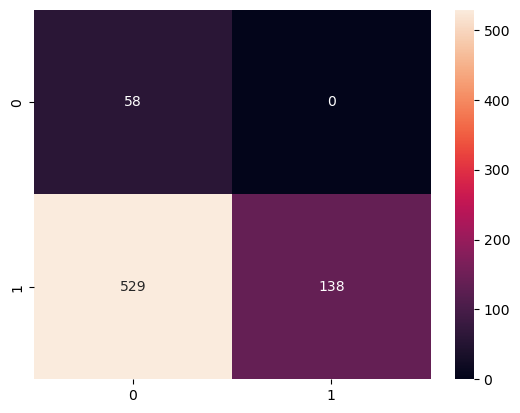

In [34]:
sns.heatmap(cfm,annot=True,fmt="d")

In [35]:
y_test.value_counts()

1    667
0     58
Name: binaryClass, dtype: int64

In [36]:
print("f1-score: ",f1_score(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

f1-score:  0.34285714285714286
Accuracy:  0.27034482758620687


##  <font color=#063970>Classification par Regression Logistique </font>

In [37]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

### Standarisation des données

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
lr.fit(X_train , y_train)

LogisticRegression()

In [42]:
y_pred = lr.predict(X_test)

In [44]:
print("f1-score:  ", f1_score(y_test, y_pred))

f1-score:   0.9780058651026392


##  <font color=#063970>Classification par SVM </font>

In [39]:
from sklearn.svm import SVC